In [16]:
import os
os.getcwd()


'/Users/apurbakoirala/Developer/Deep-Learning-Projects/Dog-VS-Cat-Classification'

In [22]:
os.environ["KAGGLE_CONFIG_DIR"] = "/Users/apurbakoirala/Developer/Deep-Learning-Projects"

# Download the dataset
!kaggle competitions download -c dogs-vs-cats --path .

403 - Forbidden - You must accept this competition's rules before you'll be able to download files.


In [24]:
!kaggle competitions download -c dogs-vs-cats

100%|███████████████████████████████████████▉| 812M/812M [00:52<00:00, 15.5MB/s]
100%|████████████████████████████████████████| 812M/812M [00:52<00:00, 16.2MB/s]


In [28]:
import zipfile
import os

# Unzip all downloaded files
for file in os.listdir("."):
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall(".")

In [30]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('./train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [31]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

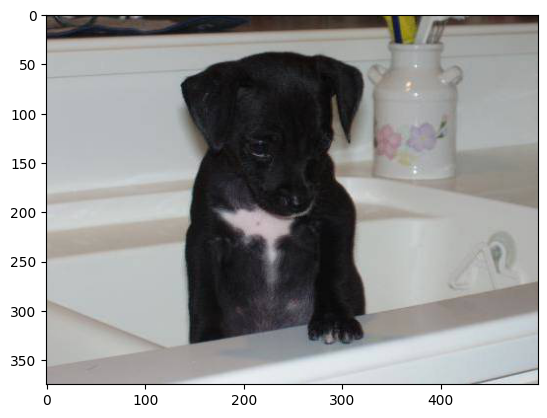

In [32]:
img = mpimg.imread('./train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

In [35]:
os.mkdir('./image resized')

In [36]:
original_folder = './train/'
resized_folder = './image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

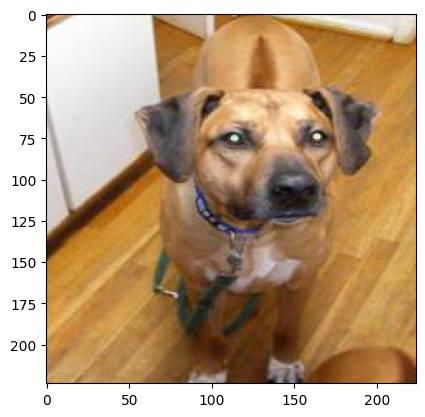

In [38]:
img = mpimg.imread('./image resized/dog.8238.jpg')
imgplt = plt.imshow(img)
plt.show()

In [39]:
filenames = os.listdir('./image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [40]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 986 1014]


In [41]:
import cv2
import glob

In [42]:
image_directory = './image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])